In [1]:
from collections import defaultdict
import numpy as np
from gensim.models import Word2Vec, KeyedVectors
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [24]:
num_clusters = 10
num_seed_words = 15
num_plot = 10

# K-means

In [32]:
%%time
# load specific word embeddings that you want 
# w2v_model = Word2Vec.load('../wv/w2v_comment_raw.model')
w2v_model = Word2Vec.load('../wv/w2v_comment_trained.model')
# w2v_model = Word2Vec.load('../wv/w2v_comment_stopword_trained.model')
w2v = w2v_model.wv.vectors
n_words = len(w2v)

Wall time: 1.39 s


In [33]:
%%time
kmeans = KMeans(n_clusters=num_clusters, n_jobs=-1, random_state=0)
cluster_idx = kmeans.fit_predict(w2v)
X_dist = kmeans.transform(w2v)**2   # [N, n_clusters]
X_dist_cluster = X_dist[range(n_words), cluster_idx]    # distance away from corresponding centroid

E:\Anaconda3\envs\nlp\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
Wall time: 8.52 s


In [6]:
print(cluster_idx)
print(X_dist[:5])
print(X_dist_cluster[:5])
print((cluster_idx == kmeans.labels_).all())

[1 1 1 ... 9 3 3]
[[179.13173  137.00194  193.87825  177.47969  193.3314   177.02106
  168.82529  173.22714  182.8256   185.25311 ]
 [171.40483  131.49051  184.00491  170.96881  180.87422  169.39629
  150.22865  165.08096  175.47403  179.77316 ]
 [151.09143  122.3203   167.26482  150.01762  166.97017  153.57074
  147.65804  149.19392  157.70093  159.98538 ]
 [155.71399  126.27024  178.0807   158.49998  174.05518  161.24652
  166.95876  158.87984  173.24068  171.22913 ]
 [ 96.48745   75.2812   102.327675  95.48899  109.38654  102.06563
  101.55417   94.285416 100.5368   104.979744]]
[137.00194 131.49051 122.3203  126.27024  75.2812 ]
True


In [7]:
print(kmeans.cluster_centers_)

[[ 0.1573746  -0.03161293  0.09015757 ... -0.10407139  0.01624244
   0.08505712]
 [ 0.01460415 -0.24699414  0.02113412 ...  0.07806721  0.02449858
  -0.38729352]
 [ 0.06255164 -0.09208041  0.19650783 ...  0.0964964  -0.09674358
  -0.14295304]
 ...
 [-0.04870617  0.09583761 -0.0424     ... -0.06899892  0.07716087
   0.04717332]
 [-0.14176169  0.14207739  0.00804573 ...  0.03974606  0.091887
   0.14099199]
 [-0.12434358  0.19872275  0.03374029 ...  0.12119108  0.29525313
   0.10073412]]


In [34]:
word_cluster_list = list(zip(w2v_model.wv.index2word, cluster_idx, X_dist_cluster))
# each tuple: (word string, cluster, distance to its cluster centroid)
# word_cluster_list_sort = sorted(word_cluster_list, key=lambda el:el[1], reverse=False)
print(word_cluster_list[:10])

[('the', 8, 113.26455), ('to', 8, 226.9502), ('and', 8, 79.77692), ('a', 8, 118.12551), ('of', 0, 182.5236), ('is', 4, 222.25925), ('that', 4, 132.82294), ('in', 0, 200.23831), ('it', 4, 147.22539), ('i', 2, 317.50107)]


In [35]:
cluster_word_dict = defaultdict(list)
# each cluster is a list, storing corresponding words
for word in word_cluster_list:
    cluster_word_dict[word[1]].append(word)

cluster_word_dict_sorted = defaultdict(list)
for c in sorted(cluster_word_dict.keys()):
    # in each cluster, sort the words with their euclidean distance to the centroid
    cluster_word_dict_sorted[c] = [(t[0], t[2]) for t in sorted(cluster_word_dict[c], key=lambda el:el[2], reverse=False)]
    print(c, cluster_word_dict_sorted[c][:num_seed_words], '\n')

0 [('diversification', 27.571217), ('principally', 35.56449), ('restoration', 39.077362), ('intercropping', 39.392162), ('topography', 40.650333), ('transportability', 40.778984), ('agroforestry', 41.551994), ('fostering', 41.969776), ('estuary', 42.422848), ('offsetting', 42.445827), ('biodiverse', 42.54817), ('facilitating', 44.354824), ('monocrop', 44.979866), ('compaction', 45.939266), ('centralization', 46.700867)] 

1 [('countered', 30.456572), ('championed', 35.183483), ('infiltrated', 36.388256), ('applauded', 39.3957), ('graded', 39.584766), ('lectured', 39.71687), ('deployed', 40.12389), ('misinterpreted', 41.537136), ('alarmed', 41.668934), ('stimulated', 42.764095), ('vetted', 44.791454), ('alerted', 44.82414), ('hammered', 44.937634), ('tapped', 45.407806), ('ensured', 45.808926)] 

2 [('toasted', 28.550762), ('croissant', 28.91949), ('fluffy', 30.252775), ('parsnip', 30.656929), ('creamy', 31.035612), ('crusty', 32.479767), ('beetroot', 33.20501), ('aloe', 33.408253), ('u

In [36]:
%%time
tsne = TSNE(n_components=2, init='pca', verbose=1)
vocab_emb = tsne.fit_transform(w2v)
print(vocab_emb.shape)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 16803 samples in 0.008s...
[t-SNE] Computed neighbors for 16803 samples in 10.591s...
[t-SNE] Computed conditional probabilities for sample 1000 / 16803
[t-SNE] Computed conditional probabilities for sample 2000 / 16803
[t-SNE] Computed conditional probabilities for sample 3000 / 16803
[t-SNE] Computed conditional probabilities for sample 4000 / 16803
[t-SNE] Computed conditional probabilities for sample 5000 / 16803
[t-SNE] Computed conditional probabilities for sample 6000 / 16803
[t-SNE] Computed conditional probabilities for sample 7000 / 16803
[t-SNE] Computed conditional probabilities for sample 8000 / 16803
[t-SNE] Computed conditional probabilities for sample 9000 / 16803
[t-SNE] Computed conditional probabilities for sample 10000 / 16803
[t-SNE] Computed conditional probabilities for sample 11000 / 16803
[t-SNE] Computed conditional probabilities for sample 12000 / 16803
[t-SNE] Computed conditional probabilities for sa

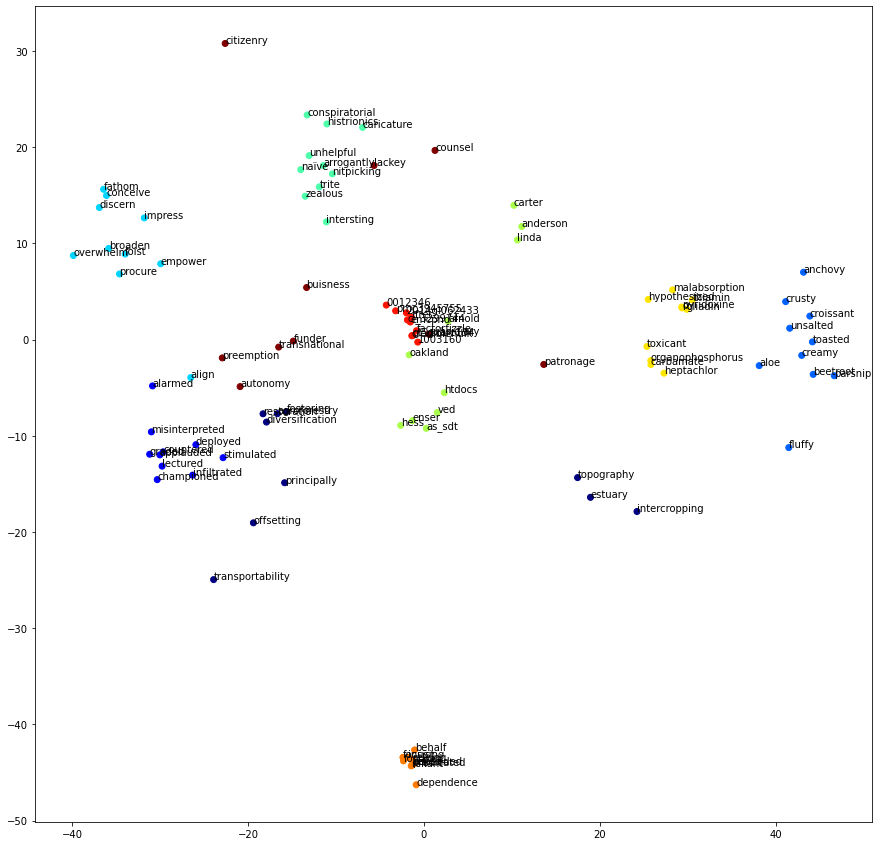

In [37]:
# word2index = {token: token_idx for token_idx, token in enumerate(w2v_model.wv.index2word)}
plt.figure(figsize=(15,15))
word_idx = []
for i, c in enumerate(cluster_word_dict_sorted.keys()):
    # word_idx = []
    draw_words = [word[0] for word in cluster_word_dict_sorted[c][:num_plot]]
    for word in draw_words:
        idx = w2v_model.wv.vocab[word].index
        word_idx.append(idx)
        # plt.scatter(vocab_emb[idx, 0], vocab_emb[idx, 1], c=colors[i], cmap='jet')
        plt.annotate(word, xy=(vocab_emb[idx, 0], vocab_emb[idx, 1]))
        # plt.text(vocab_emb[idx, 0], vocab_emb[idx, 1], word)
    # print(word_idx)
    # print(draw_words)
    # plt.scatter(vocab_emb[word_idx, 0], vocab_emb[word_idx, 1], c=[i]*num_plot, cmap='jet')

colors = []
# construct color array for all points
for i in range(num_clusters):
    colors += [i] * num_plot
plt.scatter(vocab_emb[word_idx, 0], vocab_emb[word_idx, 1], c=colors, cmap='jet')
plt.show()

# some other code for colored plot
# for i in range(X.shape[0]):
#     plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.Set1(y[i]), fontdict={'weight': 'bold', 'size': 9})

# NMF

- different options w.r.t. documents
    - segment as document
    - sentence as document
    - whole comment as document
    - all comments in one product as document

# Clarity Scoring Function